In [53]:
import pandas as pd
import numpy as np
# import plotly 
import os
import matplotlib.pyplot as plt

In [ ]:
def getPctChange(df, days = 5):
    df_pctChange5 = df.pct_change(days)
    df_pctChange5.columns = map(lambda x: x+'_pctChange5', df_pctChange5.columns )
    return(df_pctChange5)

In [54]:
dataDir =("C:\\Users\\eiahb\\Documents\\MyFiles\\PythonProject\\PHBS_machine_learning_for_finance\\PHBS_ML_for_quant_project\\00data\\macro")
list(os.listdir(dataDir))

['510050.OF_ETF.csv',
 'README.md',
 'wind全A.csv',
 '利率类20070901-20200308.csv',
 '商品类20070901-20200308.csv',
 '用wind全A算市场动量和交易活跃指标.csv',
 '股票指数类 20070901-20200308.csv']

In [110]:
rawRateDf = pd.read_csv(os.path.join(dataDir, '利率类20070901-20200308.csv'),engine='python',encoding='utf8', skiprows=3,dtype = str)
rawCommodityDf = pd.read_csv(os.path.join(dataDir, '商品类20070901-20200308.csv'),engine='python',encoding='utf8', skiprows=3,dtype = str)
rawStockIndexDf = pd.read_csv(os.path.join(dataDir, '股票指数类 20070901-20200308.csv'),engine='python', sep='\t', encoding='utf8',dtype = str)
rawWindADf = pd.read_csv(os.path.join(dataDir, '用wind全A算市场动量和交易活跃指标.csv'),engine='python',dtype = str)

In [73]:
rateDf = rawRateDf
rateDf = rateDf.rename(columns = {"指标名称":"date"})
rateDf = rateDf.set_index('date')
rateDf = rateDf.astype(float)
rateDf.index = pd.DatetimeIndex(rateDf.index)
rateDf_pctChange5 = getPctChange(rateDf)
rateDf_pctChange5.head(10)

,SHIBOR1M_pctChange5,SHIBOR3M_pctChange5,IBO001_pctChange5,SHIBOR6M_pctChange5,R007_pctChange5,B0_pctChange5,SHIBORO/N_pctChange5,SHIBOR1W_pctChange5,SHIBOR2W_pctChange5,国债到期收益率:6个月_pctChange5,国债到期收益率:1年_pctChange5,国债到期收益率:2年_pctChange5
date,,,,,,,,,,,,
2007-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-10,0.324954,0.019524,0.251791,0.011974,0.496953,0.489338,0.240919,0.446140,0.415982,NaN,NaN,NaN
2007-09-11,0.396219,0.021056,0.493467,0.014144,0.747475,0.740518,0.494380,0.723286,0.478082,NaN,NaN,NaN
2007-09-12,0.387276,0.021692,0.594967,0.014906,0.627445,0.627502,0.592760,0.642951,0.398198,NaN,NaN,NaN
2007-09-13,0.348950,0.021909,0.689319,0.017084,0.628455,0.649719,0.659193,0.648883,0.289563,NaN,NaN,NaN


In [80]:
commodityDf = rawCommodityDf
commodityDf = commodityDf.rename(columns={'指标名称':'date'})
commodityDf = commodityDf.set_index('date')
commodityDf = commodityDf.applymap(lambda x: x.replace(',', ''))
commodityDf = commodityDf.astype(float)
commodityDf.index = pd.DatetimeIndex(commodityDf.index)
commodityDf['COMEX黄金/WTI原油'] = commodityDf['期货收盘价(连续):COMEX黄金']/commodityDf['期货结算价(连续):布伦特原油']
commodityDf.loc[(commodityDf['期货收盘价(连续):COMEX黄金']==0) & (commodityDf['期货结算价(连续):布伦特原油']==0), 'COMEX黄金/WTI原油']=0

commodityDf_pctChange5 = getPctChange(commodityDf)
commodityDf_pctChange5.head(10)

,南华综合指数_pctChange5,CRB现货指数:综合_pctChange5,期货收盘价(连续):COMEX黄金_pctChange5,期货结算价(连续):布伦特原油_pctChange5,COMEX黄金/WTI原油_pctChange5
date,,,,,
2007-09-03,NaN,NaN,NaN,NaN,NaN
2007-09-04,NaN,NaN,NaN,NaN,NaN
2007-09-05,NaN,NaN,NaN,NaN,NaN
2007-09-06,NaN,NaN,NaN,NaN,NaN
2007-09-07,NaN,NaN,NaN,NaN,NaN
2007-09-10,0.007456,inf,inf,0.028198,inf
2007-09-11,0.011827,0.006124,0.042615,0.033279,0.009035
2007-09-12,0.015241,0.011881,0.043402,0.044929,-0.001461
2007-09-13,0.014320,0.009213,0.018765,0.035175,-0.015852


In [92]:
stockIndexDf = rawStockIndexDf
stockIndexDf = stockIndexDf.set_index('date')
stockIndexDf = stockIndexDf.astype(float)
stockIndexDf.index = pd.DatetimeIndex(stockIndexDf.index)
stockIndexDf_pctChange5 = getPctChange(stockIndexDf)
stockIndexDf_pctChange5.head(10)

,SPX.GI_pctChange5,N225.GI_pctChange5,000001.SH_pctChange5
date,,,
2007-09-03,NaN,NaN,NaN
2007-09-04,NaN,NaN,NaN
2007-09-05,NaN,NaN,NaN
2007-09-06,NaN,NaN,NaN
2007-09-07,NaN,NaN,NaN
2007-09-10,-0.018955,-0.024755,0.006433
2007-09-11,-0.015412,-0.015694,-0.034015
2007-09-12,-0.004240,-0.008082,-0.026002
2007-09-13,0.000445,-0.023986,-0.022261


In [112]:
windADf = rawWindADf.set_index('date')
windADf = windADf.astype(float)
windADf.index = pd.DatetimeIndex(windADf.index)
windAReturn = windADf['close'].pct_change().rename('windAReturn')
windATomorrowUp = (windAReturn.shift(-1)>0).rename('windATomorrowUp').astype(int)

In [114]:
mktVolume = windADf['volume'].rename('mktVolume')
mktVolume_pctChange5 = mktVolume.pct_change(5).rename('mktVolume_pctChange5')
mktClose_pctChange5 = windADf['close'].pct_change(5).rename('mktClose_pctChange5')
mktClose_pctChange5
mktMomentumDf = pd.concat([mktVolume, mktVolume_pctChange5, mktClose_pctChange5], axis = 1)
mktMomentumDf.head()

,mktVolume,mktVolume_pctChange5,mktClose_pctChange5
date,,,
2007-09-03,1.934243e+10,NaN,NaN
2007-09-04,1.833770e+10,NaN,NaN
2007-09-05,1.494567e+10,NaN,NaN
2007-09-06,1.626460e+10,NaN,NaN
2007-09-07,1.825542e+10,NaN,NaN


In [125]:
output_df = pd.concat([rateDf, rateDf_pctChange5,
                commodityDf, commodityDf_pctChange5,
                stockIndexDf, stockIndexDf_pctChange5,
                mktMomentumDf
               ], axis = 1)

output_df.describe()
output_df.to_csv(os.path.join(dataDir, 'macro.csv'))
# X_df.to_pickle(os.path.join(outputDir, 'factor.pkl'))

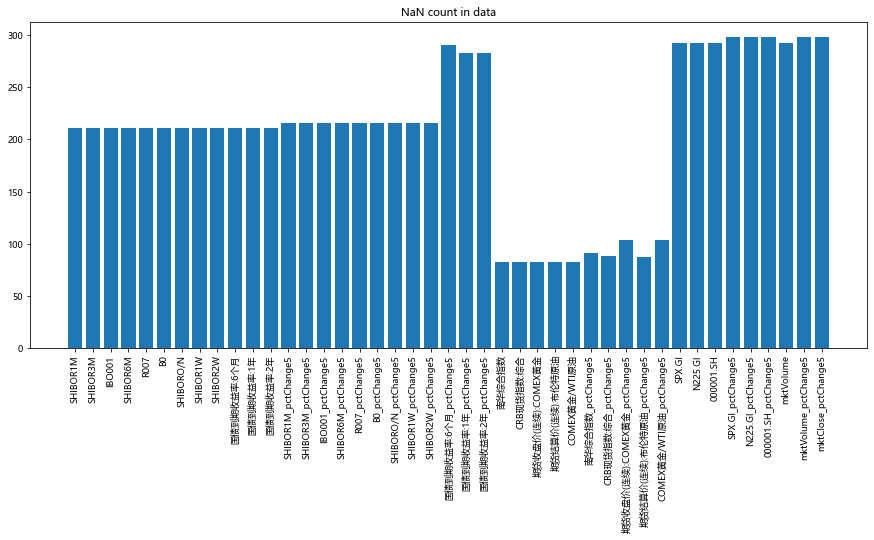

In [124]:

from pylab import * 
import matplotlib
nas_df = output_df.isna()
nas_df.resample('Y').sum()
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #更新字体格式
mpl.rcParams['font.size'] = 9 
plt.figure(figsize = (15, 6))
plt.title('NaN count in data')
plt.xticks(rotation='vertical')
plt.bar(nas_df.sum().index, nas_df.sum().values)
plt.show()